<div style=" background-color:	#adbcc1; color:white; padding: 10px; width:90%; margin:auto; text-align: center;">
    <strong><h1>To grant or not to grant: Deciding on compensation benefits</h1></strong>
    <h3>Machine Learning 2024/2025</h3>
</div>

Group members:
Filipa
Klimentina
Maria
Rita
Rita
Sven


**<h2> Table of Contents </h2>**
* [1. Data Exploration](#dataexploration)
    * [1.1 Importing Libraries and Dataset](#imports)
    * [1.2 Load the dataset](#load)
    * [1.3 Initial analysis of the dataset structure](#initial)
    * [1.4 Missing values](#missing)
    * [1.4 Duplicate values](#duplicate)
* [2. Data preprocessing](#data-preprocessing)
    * [2.1 ](#imports)


<h2 id="dataexploration"> 1. Data Exploration</h2>

<h3 id='imports'>1.1 Importing Libraries and Dataset</h3>

In [2]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno



<h3>1.2 Load the dataset</h3>

In [3]:
# Read the csv file
#We've added low_memory=False since the Zip Code column has mixed data types (numbers and strings)
wcb = pd.read_csv('train_data.csv', delimiter=',', low_memory=False)

<h3>1.3 Initial analysis of the dataset</h3>

In [4]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [5]:
wcb.shape

(593471, 33)

There are 593471 rows and 33 columns.

In [6]:
wcb.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


<strong>Target variable</strong>: <code>Claim Injury Type</code> <br>
It refers to the WCB decision regarding the benefits awarded to the claim.

<h3>1.4 Missing values</h3>

Let's start by checking which columns have missing values:

In [7]:
#Total number of missing values
total_missing = wcb.isnull().count()
#Number of missing values in each column
missing_count = wcb.isnull().sum()
#% of missing values for each column
missing_percentage=((missing_count/total_missing)*100).round(2)

missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})
missing_data = missing_data.sort_values(by='Missing Count',ascending=False)
missing_data

,Missing Count,Missing %
OIICS Nature of Injury Description,593471,100.00
IME-4 Count,460668,77.62
First Hearing Date,442673,74.59
C-3 Date,406226,68.45
Birth Year,48523,8.18
Average Weekly Wage,48096,8.10
Zip Code,48082,8.10
WCIO Part Of Body Code,36527,6.15
WCIO Part Of Body Description,36527,6.15
WCIO Nature of Injury Code,35102,5.91


<Axes: >

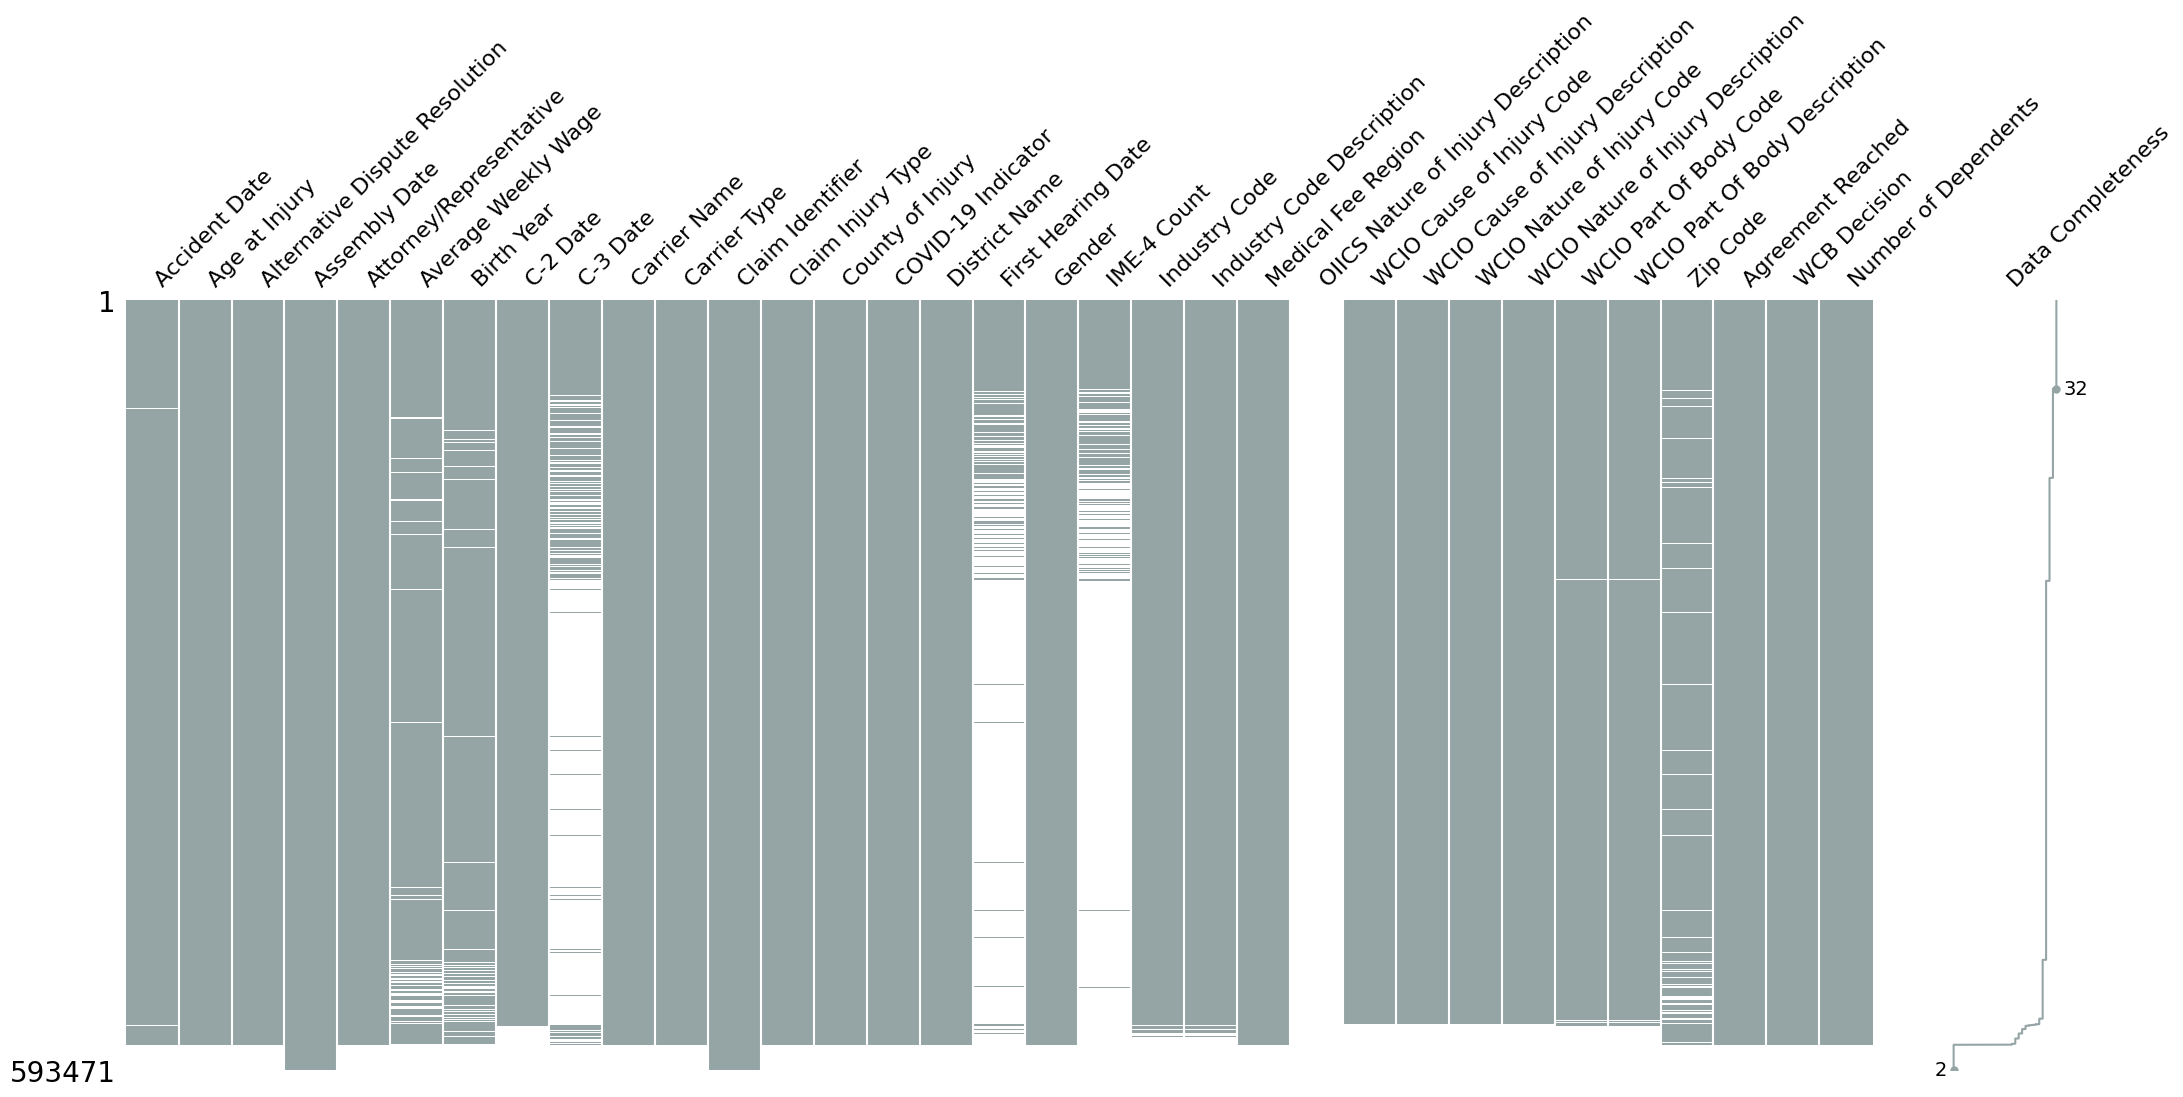

In [8]:
msno.matrix(wcb, labels=True, sort="descending", color=(149/255, 165/255, 166/255))

The column <code>OIICS Nature of Injury Description</code> is completly null, so we will drop this column.

In [9]:
wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True) #Dropping OIICS Nature of Injury Description

Note that WCB Decision only has one value: 'Not Work Related'. So we'll drop this one too as it is not useful since we don't have the values.

In [10]:
print(f'WCB Decision unique values: {wcb['WCB Decision'].unique()}')

WCB Decision unique values: ['Not Work Related' nan]


In [11]:
wcb.drop(columns=['WCB Decision'], inplace=True) #Dropping WCB Decision column

Visually we can see that there are a lot of rows with missing values. Setting a threshold of 90%, let's check how many rows are missing 90% or more of the data.

In [12]:
# Obtaining a threshold for the number oof missing values in a row
threshold_missing_data = 0.9 * wcb.shape[1]  # 90% of the number of columns

# Count the number of rows that have 90% or more of the values missing
num_rows_with_90_null = (wcb.isnull().sum(axis=1) >= threshold_missing_data).sum()

print(f"Number of rows with 90% or more null values: {num_rows_with_90_null}")


Number of rows with 90% or more null values: 19445


Given that there is a considerable amount of rows with 90% or more missing values, we will drop those.

In [13]:
wcb = wcb[wcb.isnull().sum(axis=1) < threshold_missing_data]
wcb.shape

(574026, 31)

In [14]:
#Total number of missing values
total_missing = wcb.isnull().count()
#Number of missing values in each column
missing_count = wcb.isnull().sum()
#% of missing values for each column

missing_percentage=((missing_count/total_missing)*100).round(2)
missing_data = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_percentage
})
missing_data = missing_data.sort_values(by='Missing Count',ascending=False)
missing_data

,Missing Count,Missing %
IME-4 Count,441223,76.86
First Hearing Date,423228,73.73
C-3 Date,386781,67.38
Birth Year,29078,5.07
Average Weekly Wage,28651,4.99
Zip Code,28637,4.99
WCIO Part Of Body Code,17082,2.98
WCIO Part Of Body Description,17082,2.98
WCIO Nature of Injury Code,15657,2.73
WCIO Nature of Injury Description,15657,2.73


Still, we're left with missing values that we have to evaluate one by one.

In [15]:
wcb.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Agreement Reached',
       'Number of Dependents'],
      dtype='object')

<h5>1.4.1 IME-4 Count</h5>

In [16]:
wcb['IME-4 Count'].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

> Given that the IME-4 Count refers to the number of "Independent Examiner's Report of Independent Medical Examination" forms received, we consider that it makes sense that the missing values actually refer to none, as we can see from the unique values, there are no zeros. So we'll convert the missing values to zero.

In [17]:
# wcb['IME-4 Count'].fillna(0, inplace=True)

<h5>1.4.2 First Hearing Date</h5>

> As stated in the project description, a blank date simply means that the hearing hasn't happened yet. We should look into filling these blank spaces with a placeholder NaT (after converting to datetime). Apart from it, we should consider creating a boolean column with the dates. If there was a hearing date then it's True, else it's False.

In [18]:
# wcb['First Hearing Held'] = wcb['First Hearing Date'].notnull()

<h5>1.4.3 C-2 Date and C-3 Date</h5>

> C-3 Date refers to the date that the Employee Claim Form was received, given the large percentage of missing values (67%), we've decided to assume that the blank values mean that there was no form received.

>C-2 Date if there are missing values we'll assume that it was not received. Keeping it NaT.

> Given that we'll treat these columns the same way we'll treat the First Hearing Date, noting that we should check to see if it's worth keeping the actual dates.

>If we were to fill in the null values with 'NOT RECEIVED' it would become an object. But we'll keep it as datetime for now.


In [19]:
# wcb['C-2 Form Received'] = wcb['C-2 Date'].notnull()
# wcb['C-3 Form Received'] = wcb['C-3 Date'].notnull()

<h5>1.4.4 Birth Year</h5>

> Note that there are no <code>Age at Injury</code> values missing and only 3689 <code>Accident Date</code> values missing, compared to the 29078 <code>Birth Year</code>. Given that, we could calculate the null birth years by calculating the difference between age at injury and accident date to eliminate most of the missing values.

> Note that there are a 5464 ages that are zero.

> The rest that is missing we could fill with the mean or median.

In [20]:
print((wcb['Age at Injury'] == 0).sum())

5464


In [21]:
# wcb.loc[wcb['Birth Year'].isna(), 'Birth Year'] = (
#      wcb['Accident Date'].dt.year - wcb['Age at Injury'])

# #Note that if we were to do this, we're left with 176 Birth Years missing.

<h5>1.4.5 Average Weekly Wage</h5>

In [22]:
wcb['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [23]:
(wcb['Average Weekly Wage'] == 0).sum()

np.int64(335450)

In [24]:
wcb.shape[0]

574026

In [25]:
(wcb['Average Weekly Wage']).count()

np.int64(545375)

> Apart from the missing values, there are a lot of zeros in Average Weekly Wage, and as we can see the median is zero and the mean is influenced by outliers, we could consider imputing with the median of the non-zero values.

> Or predictive imputing, maybe based on the Industry Code.

In [26]:
# # Calculate the median of non-zero values
# non_zero_median = wcb[wcb['Average Weekly Wage'] > 0]['Average Weekly Wage'].median()

# # Replace NaN values with the calculated median of non-zero values
# wcb.loc[wcb['Average Weekly Wage'].isna(), 'Average Weekly Wage'] = non_zero_median


<h5>1.4.6 Zip Code</h5>

> We'll check for patterns and see if it's important for our analysis. If not we think that we can drop this column.

> Could consider filling with a placeholder 'UNKNOWN'.

In [27]:
# wcb.fillna({'Zip Code':'Unknown'}, inplace=True)

<h5>1.4.7 WCIO BODY etc....  </h5>

> Try using

<h5>1.4.8 Industry Code and Industry Code Description</h5>

> There are 9958 missing values, we'll assume that the blank values mean that it was not reported, so we'll fill it with 'Unknown'. 

In [28]:
missing_industry_codes = wcb[wcb['Industry Code'].isna()]
missing_description_count = missing_industry_codes['Industry Code Description'].isna().sum()
missing_description_count

np.int64(9958)

> As we can see, there are claims where the Industry Code is missing, but the description isn't. We could use that to fill the missing Industry codes and vice versa.

<h5>1.4.9 Accident Date</h5>

> Could maybe fill based on assembly date? 

<h3 id="duplicate">1.5 Duplicate rows</h3>

In [29]:
wcb['Claim Identifier'].nunique()

574026

Given that the number of Claim Identifier is unique to each claim, we've decided to set it as index.

In [30]:
wcb.set_index('Claim Identifier',inplace=True) 

In [31]:
wcb.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5393875,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,I,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,1.0
5393091,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,I,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,4.0
5393889,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,II,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,6.0
5393887,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,...,II,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,1.0
5393863,2019-12-26,67.0,N,2020-01-01,N,0.00,1952.0,2019-12-31,NaN,INDEMNITY INS. OF N AMERICA,...,IV,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,38.0,SHOULDER(S),11772,0.0,5.0


In [32]:
duplicates = wcb.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [33]:
duplicate_rows = wcb[wcb.duplicated(keep=False)]  # Keep=False will show all instances of the duplicates
duplicate_rows

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5686981,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,...,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,0.0
5686771,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,...,UK,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,0.0


We will drop one of the duplicates.

In [34]:
wcb.drop_duplicates(inplace=True)
duplicates = wcb.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [35]:
wcb[wcb['Carrier Type']=='5D. SPECIAL FUND - UNKNOWN']

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5394665,2019-07-15,58.0,N,2020-01-03,Y,600.00,1961.0,2020-01-13,2019-12-31,UNINSURED EMPLOYERS FUND TPA,...,IV,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,56.0,FOOT,11356,0.0,2.0
5395890,2019-12-09,68.0,N,2020-01-06,Y,460.00,1951.0,2020-01-13,2019-12-31,UNINSURED EMPLOYERS FUND TPA,...,I,31.0,"FALL, SLIP OR TRIP, NOC",28.0,FRACTURE,34.0,WRIST,12401,1.0,5.0
5398048,2019-10-14,38.0,N,2020-01-08,Y,550.00,1981.0,2021-01-22,2020-01-02,UNINSURED EMPLOYERS FUND TPA,...,IV,99.0,"OTHER - MISCELLANEOUS, NOC",59.0,"ALL OTHER SPECIFIC INJURIES, NOC",38.0,SHOULDER(S),11413,1.0,1.0
5398160,2019-12-30,34.0,N,2020-01-09,Y,427.32,1985.0,2020-08-25,2020-01-06,UNINSURED EMPLOYERS FUND TPA,...,II,77.0,MOTOR VEHICLE,90.0,MULTIPLE PHYSICAL INJURIES ONLY,90.0,MULTIPLE BODY PARTS (INCLUDING BODY,NaN,1.0,3.0
5399197,2019-12-17,35.0,N,2020-01-09,Y,490.00,1984.0,2021-01-06,2020-01-06,UNINSURED EMPLOYERS FUND TPA,...,IV,81.0,"STRUCK OR INJURED, NOC",90.0,MULTIPLE PHYSICAL INJURIES ONLY,30.0,MULTIPLE UPPER EXTREMITIES,10455,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162985,2022-12-29,41.0,N,2022-12-28,N,2500.00,1981.0,NaN,NaN,PFL NI CARRIER UNDETERMINED,...,IV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0
6163568,2022-12-05,59.0,N,2022-12-29,Y,NaN,1963.0,2023-03-24,2022-12-22,UNINSURED EMPLOYERS FUND TPA,...,IV,77.0,MOTOR VEHICLE,52.0,STRAIN OR TEAR,-9.0,MULTIPLE,11358,0.0,5.0
6163255,2001-09-14,35.0,N,2022-12-29,Y,975.00,1966.0,2023-02-21,2022-11-10,WTC VOLUNTEER TPA,...,III,96.0,TERRORISM,1.0,NO PHYSICAL INJURY,48.0,INTERNAL ORGANS,11967,0.0,3.0


<h3>1.6 Data Type</h3>

In [36]:
wcb.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Accident Date,570337,5539,2020-03-01,1245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age at Injury,574025.0,NaN,NaN,NaN,42.114343,14.256336,0.0,31.0,42.0,54.0,117.0
Alternative Dispute Resolution,574025,3,N,571411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assembly Date,574025,897,2020-03-06,1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Attorney/Representative,574025,2,N,392291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Weekly Wage,545374.0,NaN,NaN,NaN,491.089221,6092.92367,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544947.0,NaN,NaN,NaN,1886.767454,414.644789,0.0,1965.0,1977.0,1989.0,2018.0
C-2 Date,559466,2475,2021-05-11,1847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C-3 Date,187244,1648,2021-04-21,350,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Carrier Name,574025,2046,STATE INSURANCE FUND,111144,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
wcb.dtypes

Accident Date                         object
Age at Injury                        float64
Alternative Dispute Resolution        object
Assembly Date                         object
Attorney/Representative               object
Average Weekly Wage                  float64
Birth Year                           float64
C-2 Date                              object
C-3 Date                              object
Carrier Name                          object
Carrier Type                          object
Claim Injury Type                     object
County of Injury                      object
COVID-19 Indicator                    object
District Name                         object
First Hearing Date                    object
Gender                                object
IME-4 Count                          float64
Industry Code                        float64
Industry Code Description             object
Medical Fee Region                    object
WCIO Cause of Injury Code            float64
WCIO Cause

In [38]:
wcb['Alternative Dispute Resolution'].unique()

array(['N', 'Y', 'U'], dtype=object)

<h5>1.6.1 Object </h5>

The following variables are objects and we have decided to keep them that way:
1. <code>Carrier Name</code>: categorical? We will be looking to drop this variable later, since we're thinking of using Carrier Type
2. <code>Industry Code Description</code>
3. <code>WCIO Cause of Injury Description</code>
4. <code>WCIO Nature of Injury Description</code>
5. <code>WCIO Part Of Body Description</code>
6. <code>Zip Code</code>

<h5>1.6.2 Datetime </h5>

The following variables are  objects, but we'll change them to datetime, and the missing values NaN will turn into NaT:
1. <code>Accident  Date</code>
2. <code>Assembly Date</code>
3. <code>C-2 Date</code>
4. <code>C-3 Date</code>
5. <code>First Hearing Date</code>

In [39]:
dates = ['Accident Date','Assembly Date','C-2 Date','C-3 Date','First Hearing Date']
for date in dates:
    wcb[date] = pd.to_datetime(wcb[date], errors='coerce')

<h5>1.6.3 Categorical</h5>

We will change these variables to categorical and when applicable we'll remove the numbers from the identifier.
1. <code>Carrier Type</code>: apart from changing to categorical, we'll be grouping '5D. SPECIAL FUND - UNKNOWN', '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)' and '5C. SPECIAL FUND - POI CARRIER WCB MENANDS' as 'SPECIAL FUND'. As well as changing the name of the other types to just 'PRIVATE', 'SIF', 'SELF PUBLIC' and 'SELF PUBLIC'.

2. <code>Claim Injury Type</code>: Removing the numbers and we'll have the categories 'CANCELLED', 'NON-COMP', 'MED ONLY', 'TEMPORARY', 'PPD SCH LOSS', 'PPD NSL«, 'PTD, 'DEATH'.

3. <code>County of Injury</code>: There are 63 counties, and we'll convert it to categorical as well.

4. <code>District Name</code>: 8 categories 

5. <code>Gender</code>: There are 4 unique values 'M', 'F', 'U', 'X', as we don't know the meaning of 'X' and there are only 46 records, we will be grouping it with 'U' (UNKNOWN).

6. <code>Industry Code</code>: Convert it to categorical, and assume the missing values as 'Unknown'. Drop <code>Industry Code Description</code>

7. <code>Medical Fee Region</code>: convert to numbers 1,2,3,4,5.

8. <code>WCIO Cause of Injury Code</code>: Fill missing with unknown and divide it into 10 categories, according to the WCIO Injury Description Codes for Cause of Injury: 'I.Burn or Scald', 'II. Caught In, Under or Between','III. Cut, Puncture, Scrape Injured By','IV. Fall, Slip or Trip Injury','V. Motor Vehicle','VI. Strain or Injury By', 'VII.Striking Against or Stepping On','VIII. Struck or Injured By','IX. Rubbed or Abraded By','X. Miscellaneous Causes'. 
> DROP the WCIO Cause of Injury Code and Description? Instead of creating dicitonary, as we already have them grouped, knowing the specifics won't be helpful? Same for WCIO Nature of Injury and WCIO Part of Body Code.


9. <code>WCIO Nature of Injury Code</code>: New column <code>Nature of Injury Category</code> with categories: ['Specific Injury', 'Occupational Disease or Cumulative Injury', 'Multiple Injuries', 'Unknown']
10. <code>WCIO Part Of Body Code</code>: New column  <code>Part of Body Category</code> with the categories: ['Trunk', 'Upper Extremities', 'Head and Neck', 'Lower Extremities', 'Unknown', 'Multiple Body Parts']


In [40]:
#Changing Carrier Type and grouping the special funds.
#Start by creating a dictionary that will map the names
carrier_type_map = {
    '1A. PRIVATE': 'PRIVATE',
    '2A. SIF': 'SIF',
    '3A. SELF PUBLIC': 'SELF PUBLIC',
    '4A. SELF PRIVATE': 'SELF PRIVATE',  
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND',
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
    '5D. SPECIAL FUND - UNKNOWN': 'SPECIAL FUND' #Group all 3 special funds
}

#Now let's replace the values of the Carrier Type Values with the new ones
wcb['Carrier Type'] = wcb['Carrier Type'].replace(carrier_type_map)

#Convert type to categorical
wcb['Carrier Type'] = wcb['Carrier Type'].astype('category')

In [41]:
#Let's do the same for Claim Injury Type
claim_injury_map = {
    '1. CANCELLED':'CANCELLED',
    '2. NON-COMP':'NON-COMP',
    '3. MED ONLY':'MED ONLY',
    '4. TEMPORARY':'TEMPORARY',
    '5. PPD SCH LOSS':'PPD SCH LOSS',
    '6. PPD NSL':'PPD NSL',
    '7. PTD':'PTD',
    '8. DEATH':'DEATH'
}

wcb['Claim Injury Type'] = wcb['Claim Injury Type'].replace(claim_injury_map)

wcb['Claim Injury Type'] = wcb['Claim Injury Type'].astype('category')

In [42]:
#Changing Gender to category and grouping X to U
gender_map = {'X':'U'} 
wcb['Gender']=wcb['Gender'].replace(gender_map)
wcb['Gender']=wcb['Gender'].astype('category')

In [43]:
#Create Dictionary for Industry Code
wcb_cleaned = wcb.dropna(subset=['Industry Code'])
industry_code_dictionary = dict(zip(wcb_cleaned['Industry Code'], wcb_cleaned['Industry Code Description']))
industry_code_dictionary = sorted(industry_code_dictionary.items())
industry_code_dictionary

[(11.0, 'AGRICULTURE, FORESTRY, FISHING AND HUNTING'),
 (21.0, 'MINING'),
 (22.0, 'UTILITIES'),
 (23.0, 'CONSTRUCTION'),
 (31.0, 'MANUFACTURING'),
 (32.0, 'MANUFACTURING'),
 (33.0, 'MANUFACTURING'),
 (42.0, 'WHOLESALE TRADE'),
 (44.0, 'RETAIL TRADE'),
 (45.0, 'RETAIL TRADE'),
 (48.0, 'TRANSPORTATION AND WAREHOUSING'),
 (49.0, 'TRANSPORTATION AND WAREHOUSING'),
 (51.0, 'INFORMATION'),
 (52.0, 'FINANCE AND INSURANCE'),
 (53.0, 'REAL ESTATE AND RENTAL AND LEASING'),
 (54.0, 'PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES'),
 (55.0, 'MANAGEMENT OF COMPANIES AND ENTERPRISES'),
 (56.0, 'ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT'),
 (61.0, 'EDUCATIONAL SERVICES'),
 (62.0, 'HEALTH CARE AND SOCIAL ASSISTANCE'),
 (71.0, 'ARTS, ENTERTAINMENT, AND RECREATION'),
 (72.0, 'ACCOMMODATION AND FOOD SERVICES'),
 (81.0, 'OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)'),
 (92.0, 'PUBLIC ADMINISTRATION')]

In [44]:
# Drop Industry Code Description
wcb = wcb.drop(columns=['Industry Code Description'])

In [45]:
#Fill Industry Code with Unknown and turn category
# wcb.fillna({'Industry Code':'Unknown'}, inplace=True)
wcb['Industry Code']=wcb['Industry Code'].astype('category')

In [46]:
#Simplifying medical fee region and change to category
medical_fee_map = {
    'I':1,
    'II':2,
    'III':3,
    'IV':4,
    'UK':'UNKNOWN'
}

wcb['Medical Fee Region']=wcb['Medical Fee Region'].replace(medical_fee_map)
wcb['Medical Fee Region']=wcb['Medical Fee Region'].astype('category')

In [47]:
#Changing County of Injury and District Name to category
wcb['County of Injury'] = wcb['County of Injury'].astype('category')
wcb['District Name'] = wcb['District Name'].astype('category')

In [48]:
#Grouping Cause of Injury
cause_of_injury_map = {
    # I. Burn or Scald – Heat or Cold
    1: 'Burn or Scald', 2: 'Burn or Scald', 3: 'Burn or Scald',
    4: 'Burn or Scald', 5: 'Burn or Scald', 6: 'Burn or Scald',
    7: 'Burn or Scald', 8: 'Burn or Scald', 9: 'Burn or Scald',
    11: 'Burn or Scald',14: 'Burn or Scald',84: 'Burn or Scald',

    # II. Caught In, Under or Between
    10: 'Caught In, Under or Between', 12: 'Caught In, Under or Between',
    13: 'Caught In, Under or Between', 20: 'Caught In, Under or Between',

    # III. Cut, Puncture, Scrape Injured By
    15: 'Cut, Puncture, Scrape Injured By', 16: 'Cut, Puncture, Scrape Injured By',
    17: 'Cut, Puncture, Scrape Injured By', 18: 'Cut, Puncture, Scrape Injured By',
    19: 'Cut, Puncture, Scrape Injured By',

    # IV. Fall, Slip or Trip Injury
    25: 'Fall, Slip or Trip Injury', 26: 'Fall, Slip or Trip Injury',
    27: 'Fall, Slip or Trip Injury', 28: 'Fall, Slip or Trip Injury',
    29: 'Fall, Slip or Trip Injury', 30: 'Fall, Slip or Trip Injury',
    31: 'Fall, Slip or Trip Injury', 32: 'Fall, Slip or Trip Injury',
    33: 'Fall, Slip or Trip Injury',
    
    # V. Motor Vehicle
    40: 'Motor Vehicle', 41: 'Motor Vehicle', 45: 'Motor Vehicle',
    46: 'Motor Vehicle', 47: 'Motor Vehicle', 48: 'Motor Vehicle',
    50: 'Motor Vehicle',

    # VI. Strain or Injury By
    52: 'Strain or Injury By', 53: 'Strain or Injury By', 54: 'Strain or Injury By',
    55: 'Strain or Injury By', 56: 'Strain or Injury By', 57: 'Strain or Injury By',
    58: 'Strain or Injury By', 59: 'Strain or Injury By', 60: 'Strain or Injury By',
    61: 'Strain or Injury By', 97: 'Strain or Injury By',

    # VII. Striking Against or Stepping On
    65: 'Striking Against or Stepping On', 66: 'Striking Against or Stepping On',
    67: 'Striking Against or Stepping On', 68: 'Striking Against or Stepping On',
    69: 'Striking Against or Stepping On', 70: 'Striking Against or Stepping On',

    # VIII. Struck or Injured By
    74: 'Struck or Injured By', 75: 'Struck or Injured By', 76: 'Struck or Injured By',
    77: 'Struck or Injured By', 78: 'Struck or Injured By', 79: 'Struck or Injured By',
    80: 'Struck or Injured By', 81: 'Struck or Injured By', 85: 'Struck or Injured By',
    86: 'Struck or Injured By',

    # IX. Rubbed or Abraded By
    94: 'Rubbed or Abraded By', 95: 'Rubbed or Abraded By',

    # X. Miscellaneous Causes
    82: 'Miscellaneous Causes', 83: 'Miscellaneous Causes', 87: 'Miscellaneous Causes',
    88: 'Miscellaneous Causes', 89: 'Miscellaneous Causes', 90: 'Miscellaneous Causes',
    91: 'Miscellaneous Causes', 93: 'Miscellaneous Causes', 96: 'Miscellaneous Causes',
    98: 'Miscellaneous Causes', 99: 'Miscellaneous Causes'
}
wcb['Cause of Injury Category'] = wcb['WCIO Cause of Injury Code'].map(cause_of_injury_map)
# wcb['Cause of Injury Category'] = wcb['WCIO Cause of Injury Code'].map(cause_of_injury_map).fillna('Unknown')
# wcb.fillna({'WCIO Cause of Injury Code':'Unknown'}, inplace=True)

> 14764 cases with all the codes missing. What to do?

In [49]:
filtered_df = wcb[(wcb['WCIO Nature of Injury Code'].isna()) & (wcb['WCIO Cause of Injury Code'].isna()) & (wcb['WCIO Part Of Body Code'].isna())]
filtered_df.shape[0]

14763

In [50]:
#Grouping Nature of Injury
nature_injury_map = {
    1: 'Specific Injury', 2: 'Specific Injury', 3: 'Specific Injury',
    4: 'Specific Injury', 7: 'Specific Injury', 10: 'Specific Injury',  
    13: 'Specific Injury', 16: 'Specific Injury', 19: 'Specific Injury',   
    22: 'Specific Injury', 25: 'Specific Injury', 28: 'Specific Injury',
    30: 'Specific Injury', 31: 'Specific Injury', 32: 'Specific Injury',
    34: 'Specific Injury', 36: 'Specific Injury', 37: 'Specific Injury',
    38: 'Specific Injury', 40: 'Specific Injury', 41: 'Specific Injury',
    42: 'Specific Injury', 43: 'Specific Injury', 46: 'Specific Injury',
    47: 'Specific Injury', 49: 'Specific Injury', 52: 'Specific Injury',
    53: 'Specific Injury', 54: 'Specific Injury', 55: 'Specific Injury',
    58: 'Specific Injury', 59: 'Specific Injury', 

    # Occupational Disease or Cumulative Injury
    60: 'Occupational Disease or Cumulative Injury', 61: 'Occupational Disease or Cumulative Injury',  
    62: 'Occupational Disease or Cumulative Injury', 63: 'Occupational Disease or Cumulative Injury',  
    64: 'Occupational Disease or Cumulative Injury', 65: 'Occupational Disease or Cumulative Injury',
    66: 'Occupational Disease or Cumulative Injury', 67: 'Occupational Disease or Cumulative Injury', 
    68: 'Occupational Disease or Cumulative Injury', 69: 'Occupational Disease or Cumulative Injury', 
    70: 'Occupational Disease or Cumulative Injury', 71: 'Occupational Disease or Cumulative Injury', 
    72: 'Occupational Disease or Cumulative Injury', 73: 'Occupational Disease or Cumulative Injury', 
    74: 'Occupational Disease or Cumulative Injury', 75: 'Occupational Disease or Cumulative Injury', 
    76: 'Occupational Disease or Cumulative Injury', 77: 'Occupational Disease or Cumulative Injury',
    78: 'Occupational Disease or Cumulative Injury', 79: 'Occupational Disease or Cumulative Injury',
    80: 'Occupational Disease or Cumulative Injury', 83: 'Occupational Disease or Cumulative Injury', 

    # Multiple Injuries
    90: 'Multiple Injuries', 
    91: 'Multiple Injuries' 
}
wcb['Nature of Injury Category'] = wcb['WCIO Nature of Injury Code'].map(nature_injury_map)
# wcb['Nature of Injury Category'] = wcb['WCIO Nature of Injury Code'].map(nature_injury_map).fillna('Unknown')
# wcb.fillna({'WCIO Nature of Injury Code':'Unknown'}, inplace=True)

> When we check the documentation for WCIO Part of Body Code there is no code '-9'. But if we check the unique values of the Part of Body description, for when WCIO Part of Body Code is '-9', the only value that shows up is 'MULTIPLE'. So we'll just map it to xxxx

In [51]:
# Check for descriptions for part of body code -9
wcb[wcb['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

In [52]:
part_of_body_map = {
    # Head and Neck
    10: 'Head and Neck', 14: 'Head and Neck', 17: 'Head and Neck',
    18: 'Head and Neck', 15: 'Head and Neck', 13: 'Head and Neck',
    12: 'Head and Neck', 16: 'Head and Neck', 20: 'Head and Neck',
    25: 'Head and Neck', 24: 'Head and Neck', 26: 'Head and Neck',
    11: 'Head and Neck', 19: 'Head and Neck', 21:'Head and Neck',
    22:'Head and Neck',23:'Head and Neck',

    # Upper Extremities
    30: 'Upper Extremities', 31: 'Upper Extremities', 32: 'Upper Extremities',
    33: 'Upper Extremities', 34: 'Upper Extremities', 35: 'Upper Extremities',
    36: 'Upper Extremities', 37: 'Upper Extremities', 38: 'Upper Extremities',
    39: 'Upper Extremities',

    # Trunk
    40: 'Trunk', 41: 'Trunk', 42: 'Trunk', 43: 'Trunk', 44: 'Trunk',
    45: 'Trunk', 46: 'Trunk', 47: 'Trunk', 48: 'Trunk', 49: 'Trunk',
    60: 'Trunk', 61: 'Trunk', 62: 'Trunk', 63: 'Trunk',

    # Lower Extremities
    50: 'Lower Extremities', 51: 'Lower Extremities', 52: 'Lower Extremities',
    53: 'Lower Extremities', 54: 'Lower Extremities', 55: 'Lower Extremities',
    56: 'Lower Extremities', 57: 'Lower Extremities', 58: 'Lower Extremities',

    # Multiple Body Parts
    64: 'Multiple Body Parts', 65: 'Multiple Body Parts', 66: 'Multiple Body Parts',
    90: 'Multiple Body Parts', 91: 'Multiple Body Parts', 99: 'Multiple Body Parts',
    -9: 'Multiple Body Parts'
}
wcb['Part of Body Category'] = wcb['WCIO Part Of Body Code'].map(part_of_body_map)
# wcb['Part of Body Category'] = wcb['WCIO Part Of Body Code'].map(part_of_body_map).fillna('Unknown')
# wcb.fillna({'WCIO Part Of Body Code':'Unknown'}, inplace=True)

In [53]:

# Changing the new columns to category
wcb['Cause of Injury Category']=wcb['Cause of Injury Category'].astype('category')
wcb['Nature of Injury Category']=wcb['Nature of Injury Category'].astype('category')
wcb['Part of Body Category']=wcb['Part of Body Category'].astype('category')

> Create dictionary for the codes and descriptions. And drop descriptions.

In [54]:
#Create Dictionary for Cause of Injury
wcb_cleaned = wcb.dropna(subset=['WCIO Cause of Injury Code'])
cause_of_injury_dictionary = dict(zip(wcb_cleaned['WCIO Cause of Injury Code'], wcb_cleaned['WCIO Cause of Injury Description']))
cause_of_injury_dictionary

{27.0: 'FROM LIQUID OR GREASE SPILLS',
 97.0: 'REPETITIVE MOTION',
 79.0: 'OBJECT BEING LIFTED OR HANDLED',
 16.0: 'HAND TOOL, UTENSIL; NOT POWERED',
 31.0: 'FALL, SLIP OR TRIP, NOC',
 19.0: 'CUT, PUNCTURE, SCRAPE, NOC',
 99.0: 'OTHER - MISCELLANEOUS, NOC',
 81.0: 'STRUCK OR INJURED, NOC',
 75.0: 'FALLING OR FLYING OBJECT',
 1.0: 'CHEMICALS',
 45.0: 'COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE',
 56.0: 'LIFTING',
 53.0: 'TWISTING',
 29.0: 'ON SAME LEVEL',
 60.0: 'STRAIN OR INJURY BY, NOC',
 50.0: 'MOTOR VEHICLE, NOC',
 25.0: 'FROM DIFFERENT LEVEL (ELEVATION)',
 57.0: 'PUSHING OR PULLING',
 87.0: 'FOREIGN MATTER (BODY) IN EYE(S)',
 74.0: 'FELLOW WORKER, PATIENT OR OTHER PERSON',
 5.0: 'STEAM OR HOT FLUIDS',
 68.0: 'STATIONARY OBJECT',
 32.0: 'ON ICE OR SNOW',
 82.0: 'ABSORPTION, INGESTION OR INHALATION, NOC',
 89.0: 'PERSON IN ACT OF A CRIME',
 17.0: 'OBJECT BEING LIFTED OR HANDLED',
 28.0: 'INTO OPENINGS',
 33.0: 'ON STAIRS',
 26.0: 'FROM LADDER OR SCAFFOLDING',
 30.0: 'SLIP, OR TRIP, 

In [55]:
#Create Dictionary for Nature of Injury
wcb_cleaned = wcb.dropna(subset=['WCIO Nature of Injury Code'])
nature_of_injury_dictionary = dict(zip(wcb_cleaned['WCIO Nature of Injury Code'], wcb_cleaned['WCIO Nature of Injury Description']))
# nature_of_injury_dictionary = sorted(nature_of_injury_dictionary.items())
nature_of_injury_dictionary

{10.0: 'CONTUSION',
 49.0: 'SPRAIN OR TEAR',
 7.0: 'CONCUSSION',
 43.0: 'PUNCTURE',
 40.0: 'LACERATION',
 71.0: 'ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC',
 59.0: 'ALL OTHER SPECIFIC INJURIES, NOC',
 37.0: 'INFLAMMATION',
 4.0: 'BURN',
 52.0: 'STRAIN OR TEAR',
 28.0: 'FRACTURE',
 25.0: 'FOREIGN BODY',
 90.0: 'MULTIPLE PHYSICAL INJURIES ONLY',
 46.0: 'RUPTURE',
 16.0: 'DISLOCATION',
 80.0: 'ALL OTHER CUMULATIVE INJURY, NOC',
 34.0: 'HERNIA',
 3.0: 'ANGINA PECTORIS',
 78.0: 'CARPAL TUNNEL SYNDROME',
 1.0: 'NO PHYSICAL INJURY',
 36.0: 'INFECTION',
 13.0: 'CRUSHING',
 53.0: 'SYNCOPE',
 42.0: 'POISONING - GENERAL (NOT OD OR CUMULATIVE',
 65.0: 'RESPIRATORY DISORDERS',
 31.0: 'HEARING LOSS OR IMPAIRMENT',
 77.0: 'MENTAL STRESS',
 47.0: 'SEVERANCE',
 19.0: 'ELECTRIC SHOCK',
 72.0: 'LOSS OF HEARING',
 60.0: 'DUST DISEASE, NOC',
 68.0: 'DERMATITIS',
 54.0: 'ASPHYXIATION',
 69.0: 'MENTAL DISORDER',
 73.0: 'CONTAGIOUS DISEASE',
 2.0: 'AMPUTATION',
 41.0: 'MYOCARDIAL INFARCTION',
 66.0: 'POISONI

In [56]:
#Create Dictionary for Part of Body
wcb_cleaned = wcb.dropna(subset=['WCIO Part Of Body Code'])
part_of_body_dictionary = dict(zip(wcb_cleaned['WCIO Part Of Body Code'], wcb_cleaned['WCIO Part Of Body Description']))
part_of_body_dictionary

{62.0: 'BUTTOCKS',
 38.0: 'SHOULDER(S)',
 10.0: 'MULTIPLE HEAD INJURY',
 36.0: 'FINGER(S)',
 60.0: 'LUNGS',
 14.0: 'EYE(S)',
 55.0: 'ANKLE',
 53.0: 'KNEE',
 37.0: 'THUMB',
 42.0: 'LOWER BACK AREA',
 61.0: 'ABDOMEN INCLUDING GROIN',
 54.0: 'LOWER LEG',
 51.0: 'HIP',
 52.0: 'UPPER LEG',
 17.0: 'MOUTH',
 34.0: 'WRIST',
 23.0: 'SPINAL CORD',
 35.0: 'HAND',
 18.0: 'SOFT TISSUE',
 31.0: 'UPPER ARM',
 25.0: 'SOFT TISSUE',
 56.0: 'FOOT',
 32.0: 'ELBOW',
 30.0: 'MULTIPLE UPPER EXTREMITIES',
 90.0: 'MULTIPLE BODY PARTS (INCLUDING BODY',
 91.0: 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS',
 20.0: 'MULTIPLE NECK INJURY',
 44.0: 'CHEST',
 39.0: 'WRIST (S) & HAND(S)',
 13.0: 'EAR(S)',
 50.0: 'MULTIPLE LOWER EXTREMITIES',
 43.0: 'DISC',
 33.0: 'LOWER ARM',
 -9.0: 'MULTIPLE',
 22.0: 'DISC',
 41.0: 'UPPER BACK AREA',
 11.0: 'SKULL',
 57.0: 'TOES',
 19.0: 'FACIAL BONES',
 16.0: 'TEETH',
 66.0: 'NO PHYSICAL INJURY',
 40.0: 'MULTIPLE TRUNK',
 99.0: 'WHOLE BODY',
 65.0: 'INSUFFICIENT INFO TO PROPERLY IDENTIFY 

In [57]:
# #Drop Cause of Injury, Nature of Injury and Part of Body Description
wcb = wcb.drop(columns=['WCIO Cause of Injury Description'])
wcb = wcb.drop(columns=['WCIO Nature of Injury Description'])
wcb = wcb.drop(columns=['WCIO Part Of Body Description'])

In [58]:
wcb['WCIO Cause of Injury Code']=wcb['WCIO Cause of Injury Code'].astype('category')
wcb['WCIO Nature of Injury Code']=wcb['WCIO Nature of Injury Code'].astype('category')
wcb['WCIO Part Of Body Code']=wcb['WCIO Part Of Body Code'].astype('category')

<h5>1.6.4 Integer</h5>

1. <code>Age at Injury</code>: Age has no missing values, so we should just convert it to int right away.

2. <code>Birth Year</code>: It's got missing values, so we'll take care of those later on and then convert it to int.

3. <code>IME-4 Count</code>: Should also be int, but it's got 441222 missing values. We'll impute and discuss the missing values later on.

4. <code>Number of Dependents</code>: Has no missing values, so we can turn it into int type now.

In [59]:
wcb['Age at Injury'] = wcb['Age at Injury'].astype('int')
wcb['Number of Dependents'] = wcb['Number of Dependents'].astype('int')

<h5>1.6.5 Float</h5>

1. Avergae Weekly Wage: it's a float and should maintain as a float, as it is an average of the weekly wage.

<h5>1.6.6 Boolean</h5>

1. <code>Alternative Dispute Resolution</code>: it's an object but should be treated as boolean, as in if there was or wasn't an Alternative Dispute Resolution. Note that there are 5 entries where the value is 'U', we'll replace those with None and decide on what to do later.

2. <code>Attorney/Representative</code>: 'Y' and 'N', change to boolean.

3. <code>COVID-19 Indicator</code>: values 'Y' and 'N', so we'll change to boolean as well.

4. <code>Agreement Reached</code>: Values 0 and 1, with dtype as float. Change to boolean.


In [60]:
wcb[wcb['First Hearing Date'].isna()].shape

(423228, 29)

In [61]:

wcb['Alternative Dispute Resolution'] = wcb['Alternative Dispute Resolution'].replace('U', None)

change_to_bool = ['Alternative Dispute Resolution','Attorney/Representative','COVID-19 Indicator', 'Agreement Reached']
for column in change_to_bool:
    wcb[column]=wcb[column].map({'Y': True, 'N': False, 0:False, 1:True})
    wcb[column]=wcb[column].astype('bool')

#Turn them all to bool, note that null values will turn to False. 
#But only Alternative Dispute Resolution has null values, and it's 5.

In [62]:
wcb.dtypes

Accident Date                     datetime64[ns]
Age at Injury                              int64
Alternative Dispute Resolution              bool
Assembly Date                     datetime64[ns]
Attorney/Representative                     bool
Average Weekly Wage                      float64
Birth Year                               float64
C-2 Date                          datetime64[ns]
C-3 Date                          datetime64[ns]
Carrier Name                              object
Carrier Type                            category
Claim Injury Type                       category
County of Injury                        category
COVID-19 Indicator                          bool
District Name                           category
First Hearing Date                datetime64[ns]
Gender                                  category
IME-4 Count                              float64
Industry Code                           category
Medical Fee Region                      category
WCIO Cause of Injury

<h4>Numerical and Categorical variables</h4>

| Numerical             |Categorical                      |
|-----------            |-----------                      |
|Accident Date          |Alternative Dispute Resolution   | 
|Age at Injury          |Carrier Name                     | 
|Assembly Date          |Carrier Type                     | 
|Average Weekly Wage    |Claim Injury Type                |
|Birth Year             |County of Injury                 |
|C-2 Date               |COVID-19 Indicator               |
|C-3 Date               |District Name                    |
|IME-4 Count            |First Hearing Held               |
|Number of Dependents   |Gender                           |
|First Hearing Date     |Industry Code                    |
|                       |Medical Fee Region               |
|                       |WCIO Cause of Injury Code        |
|                       |WCIO Nature of Injury Code       |
|                       |WCIO Part Of Body Code           |
|                       |Zip Code                         |
|                       |Agreement Reached                |
|                       |Cause of Injury Category         |
|                       |Nature of Injury Category        |
|                       |Part of Body Category            |

WCIO descriptions are not included because they will be dropped afterwards.

In [63]:
numerical = ['Accident Date','Age at Injury','Assembly Date','Average Weekly Wage',
             'Birth Year', 'C-2 Date','C-3 Date','First Hearing Date','IME-4 Count','Number of Dependents']

categorical = ['Alternative Dispute Resolution','Carrier Name','Carrier Type',
                'County of Injury','COVID-19 Indicator',
                'District Name','Gender','Industry Code',
                'Medical Fee Region','WCIO Cause of Injury Code',
                'WCIO Nature of Injury Code','WCIO Part Of Body Code',
                'Zip Code','Agreement Reached','Cause of Injury Category',
                'Nature of Injury Category', 'Part of Body Category']

In [64]:
wcb[numerical].describe().T

,count,mean,min,25%,50%,75%,max,std
Accident Date,570337,2021-04-28 21:00:27.892982784,1961-09-06 00:00:00,2020-09-14 00:00:00,2021-06-27 00:00:00,2022-03-21 00:00:00,2023-09-29 00:00:00,NaN
Age at Injury,574025.0,42.114343,0.0,31.0,42.0,54.0,117.0,14.256336
Assembly Date,574025,2021-07-19 19:01:54.473760256,2020-01-01 00:00:00,2020-10-27 00:00:00,2021-07-30 00:00:00,2022-04-19 00:00:00,2022-12-31 00:00:00,NaN
Average Weekly Wage,545374.0,491.089221,0.0,0.0,0.0,841.0,2828079.0,6092.92367
Birth Year,544947.0,1886.767454,0.0,1965.0,1977.0,1989.0,2018.0,414.644789
C-2 Date,559466,2021-07-16 20:11:19.865443328,1996-01-12 00:00:00,2020-11-06 00:00:00,2021-08-09 00:00:00,2022-04-26 00:00:00,2024-06-01 00:00:00,NaN
C-3 Date,187244,2021-07-26 21:32:29.772489728,1992-11-13 00:00:00,2020-10-27 00:00:00,2021-07-21 00:00:00,2022-04-20 00:00:00,2024-05-31 00:00:00,NaN
First Hearing Date,150797,2022-03-19 05:05:32.863386368,2020-01-30 00:00:00,2021-06-01 00:00:00,2022-03-09 00:00:00,2023-01-11 00:00:00,2024-06-07 00:00:00,NaN
IME-4 Count,132803.0,3.207337,1.0,1.0,2.0,4.0,73.0,2.832303
Number of Dependents,574025.0,3.006564,0.0,1.0,3.0,5.0,6.0,2.000799


1. <code>Accident Date</code>: Most of the data seems to be concentrated around the 2020s, but the minimum value is 1961-09-06, so we should look into the outliers. 
2. <code>Age at Injury</code>: Age zero?
3. Average weekly wage: A lot of zeros, 50% zeros. What do? Drop this variable?
4. Birth Year: There are clear outliers, as the mean = 1886 and the standard deviation = 214. Clearly because of the birth year=0.
5. Loads of missing values in C-2 Date and C-3 Date
6. IME-4 Count: max is 73, outlier ?
The rest seems ok.

In [65]:
wcb[wcb['Accident Date'] < '2020-01-01'].shape[0]

20795

In [66]:
wcb['Alternative Dispute Resolution'].value_counts(normalize=True)

Alternative Dispute Resolution
False    0.995446
True     0.004554
Name: proportion, dtype: float64

In [67]:
wcb['COVID-19 Indicator'].value_counts(normalize=True)

COVID-19 Indicator
False    0.952056
True     0.047944
Name: proportion, dtype: float64

In [68]:
wcb['Agreement Reached'].value_counts(normalize=True)

Agreement Reached
False    0.953335
True     0.046665
Name: proportion, dtype: float64

In [69]:
wcb.Gender.value_counts(normalize="True")

Gender
M    0.583976
F    0.407737
U    0.008287
Name: proportion, dtype: float64

## 2. DATA PREPROCESSING

### Data splitting

In [70]:
from sklearn.model_selection import train_test_split
X = wcb.drop('Claim Injury Type', axis=1)
y = wcb['Claim Injury Type'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=0,
                                                stratify=y)

## MISSING VALUES

In [71]:
X_train['IME-4 Count'] = X_train['IME-4 Count'].fillna(0)

In [72]:
X_train.isna().sum().sort_values(ascending=False)

First Hearing Date                338600
C-3 Date                          309268
Birth Year                         23214
Average Weekly Wage                23022
Zip Code                           22904
WCIO Part Of Body Code             13718
Part of Body Category              13718
WCIO Nature of Injury Code         12564
Nature of Injury Category          12564
Cause of Injury Category           12553
WCIO Cause of Injury Code          12553
C-2 Date                           11676
Industry Code                       7985
Accident Date                       2964
Carrier Name                           0
Carrier Type                           0
Alternative Dispute Resolution         0
Age at Injury                          0
Assembly Date                          0
Attorney/Representative                0
County of Injury                       0
Medical Fee Region                     0
District Name                          0
Gender                                 0
COVID-19 Indicat

In [73]:
#ACCIDENT DATE
filtered_df = X_train.dropna(subset=['Accident Date', 'Assembly Date']).copy()
filtered_df.loc[:, 'Time Difference'] = (filtered_df['Assembly Date'] - filtered_df['Accident Date']).dt.days
mean_time_difference = filtered_df['Time Difference'].mean()
X_train.loc[X_train['Accident Date'].isna(), 'Accident Date'] = X_train['Assembly Date'] - pd.Timedelta(days=mean_time_difference)

In [74]:
#BIRTH YEAR
X_train.loc[X_train['Birth Year'].isna(), 'Birth Year'] = (
         X_train['Accident Date'].dt.year - X_train['Age at Injury'])

In [75]:
#ZIP CODE
X_train.fillna({'Zip Code':'Unknown'}, inplace=True)

> High correlation between Industry Code and County of Injury, Industry Code and WCIO Cause of Injury Code, WCIO Cause of Injury Code and [WCIO Nature of Injury + WCIO Part of body code]

In [76]:

# # from scipy.stats import chi2_contingency

# cleaned_data = X_train.dropna(subset=['Industry Code', 'WCIO Cause of Injury Code','WCIO Nature of Injury Code','WCIO Part Of Body Code','Average Weekly Wage'])

# # # pd.crosstab(cleaned_data['County of Injury'], cleaned_data['Industry Code'])

# # # pd.crosstab(cleaned_data[cleaned_data['Industry Code'], 'WCIO Cause of Injury Code'])
# # # pd.crosstab(cleaned_data['WCIO Cause of Injury Code'], cleaned_data['WCIO Nature of Injury Code'])
# # # pd.crosstab(cleaned_data['WCIO Cause of Injury Code'], cleaned_data['WCIO Part Of Body Code'])

# # pd.crosstab(cleaned_data['Industry Code'], cleaned_data['Average Weekly Wage']>0)


# contingency_table = pd.crosstab(cleaned_data['Industry Code'], cleaned_data['Average Weekly Wage']>0)


# # Chi squared test
# chi2, p, dof, expected = chi2_contingency(contingency_table)

# print(f"Chi-squared statistic: {chi2}")
# print(f"P-value: {p}")

In [77]:
#INDUSTRY CODE FILL WITH MODE BASED ON COUNTY OF INJURY, PERCENTAGES ARE SIMILAR
X_train['Industry Code'] = X_train.groupby('County of Injury', observed=True)['Industry Code'].transform(lambda x: x.fillna(x.mode()[0]))


In [78]:
X_train['WCIO Cause of Injury Code'] = X_train.groupby('Industry Code', observed=True)['WCIO Cause of Injury Code'].transform(lambda x: x.fillna(x.mode()[0]))
X_train['WCIO Nature of Injury Code'] = X_train.groupby('WCIO Cause of Injury Code', observed=True)['WCIO Nature of Injury Code'].transform(lambda x: x.fillna(x.mode()[0]))
X_train['WCIO Part Of Body Code'] = X_train.groupby('WCIO Cause of Injury Code', observed=True)['WCIO Part Of Body Code'].transform(lambda x: x.fillna(x.mode()[0]))

In [79]:
X_train['Cause of Injury Category'] = X_train['WCIO Cause of Injury Code'].map(cause_of_injury_map)

X_train['Nature of Injury Category'] = X_train['WCIO Nature of Injury Code'].map(nature_injury_map)

X_train['Part of Body Category'] = X_train['WCIO Part Of Body Code'].map(part_of_body_map)


In [80]:
#A LOT OF ZEROS, DOESNT MAKE SENSE TO BE ZERO. WE'LL TURN ZERO TO NAN AND USE MEAN OF THE WEEKLY WAGES BASED ON INDUSTRY CODE
X_train.loc[wcb['Average Weekly Wage'] == 0, 'Average Weekly Wage'] = np.nan
X_train['Average Weekly Wage'] = X_train.groupby('Industry Code', observed=False)['Average Weekly Wage'].transform(lambda x: x.fillna(x.mean()))

#THERE ARE INDUSTRY CODES NAN SO WE'LL FILL THE REST WITH MEAN
overall_mean = X_train['Average Weekly Wage'].mean()
X_train.loc[:, 'Average Weekly Wage'] = X_train['Average Weekly Wage'].fillna(overall_mean)


In [81]:
X_train.isna().sum().sort_values(ascending=False)

First Hearing Date                338600
C-3 Date                          309268
C-2 Date                           11676
Accident Date                          0
Assembly Date                          0
Alternative Dispute Resolution         0
Average Weekly Wage                    0
Attorney/Representative                0
Birth Year                             0
Carrier Name                           0
Carrier Type                           0
Age at Injury                          0
County of Injury                       0
COVID-19 Indicator                     0
District Name                          0
Gender                                 0
IME-4 Count                            0
Industry Code                          0
Medical Fee Region                     0
WCIO Cause of Injury Code              0
WCIO Nature of Injury Code             0
WCIO Part Of Body Code                 0
Zip Code                               0
Agreement Reached                      0
Number of Depend

> MISSING VALUES IN FIRST HEARING, C-2 DATE, C-3 DATE TO REMAIN AS NaT

> Need to apply for X_val as well

## OUTLIERS

In [82]:
X_train[numerical].describe()

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,First Hearing Date,IME-4 Count,Number of Dependents
count,459220,459220.000000,459220,4.592200e+05,459220.000000,447544,149952,120620,459220.000000,459220.000000
mean,2021-04-28 09:53:37.184895744,42.113521,2021-07-19 18:25:12.310439680,1.226782e+03,1891.227475,2021-07-16 17:45:13.690721024,2021-07-27 10:26:26.235595264,2022-03-19 21:01:52.817111808,0.742296,3.007175
min,1961-09-06 00:00:00,0.000000,2020-01-01 00:00:00,1.394000e+01,0.000000,1996-01-12 00:00:00,1992-11-13 00:00:00,2020-01-30 00:00:00,0.000000,0.000000
25%,2020-09-14 00:00:00,31.000000,2020-10-27 00:00:00,8.755975e+02,1965.000000,2020-11-05 00:00:00,2020-10-28 00:00:00,2021-06-02 00:00:00,0.000000,1.000000
50%,2021-06-26 00:00:00,42.000000,2021-07-30 00:00:00,1.189894e+03,1977.000000,2021-08-09 00:00:00,2021-07-21 00:00:00,2022-03-10 00:00:00,0.000000,3.000000
75%,2022-03-21 00:00:00,54.000000,2022-04-19 00:00:00,1.399540e+03,1989.000000,2022-04-26 00:00:00,2022-04-20 00:00:00,2023-01-11 00:00:00,0.000000,5.000000
max,2023-09-29 00:00:00,117.000000,2022-12-31 00:00:00,2.828079e+06,2022.000000,2024-06-01 00:00:00,2024-05-31 00:00:00,2024-06-07 00:00:00,73.000000,6.000000
std,NaN,14.263688,NaN,5.306454e+03,404.944912,NaN,NaN,NaN,1.923482,2.000656


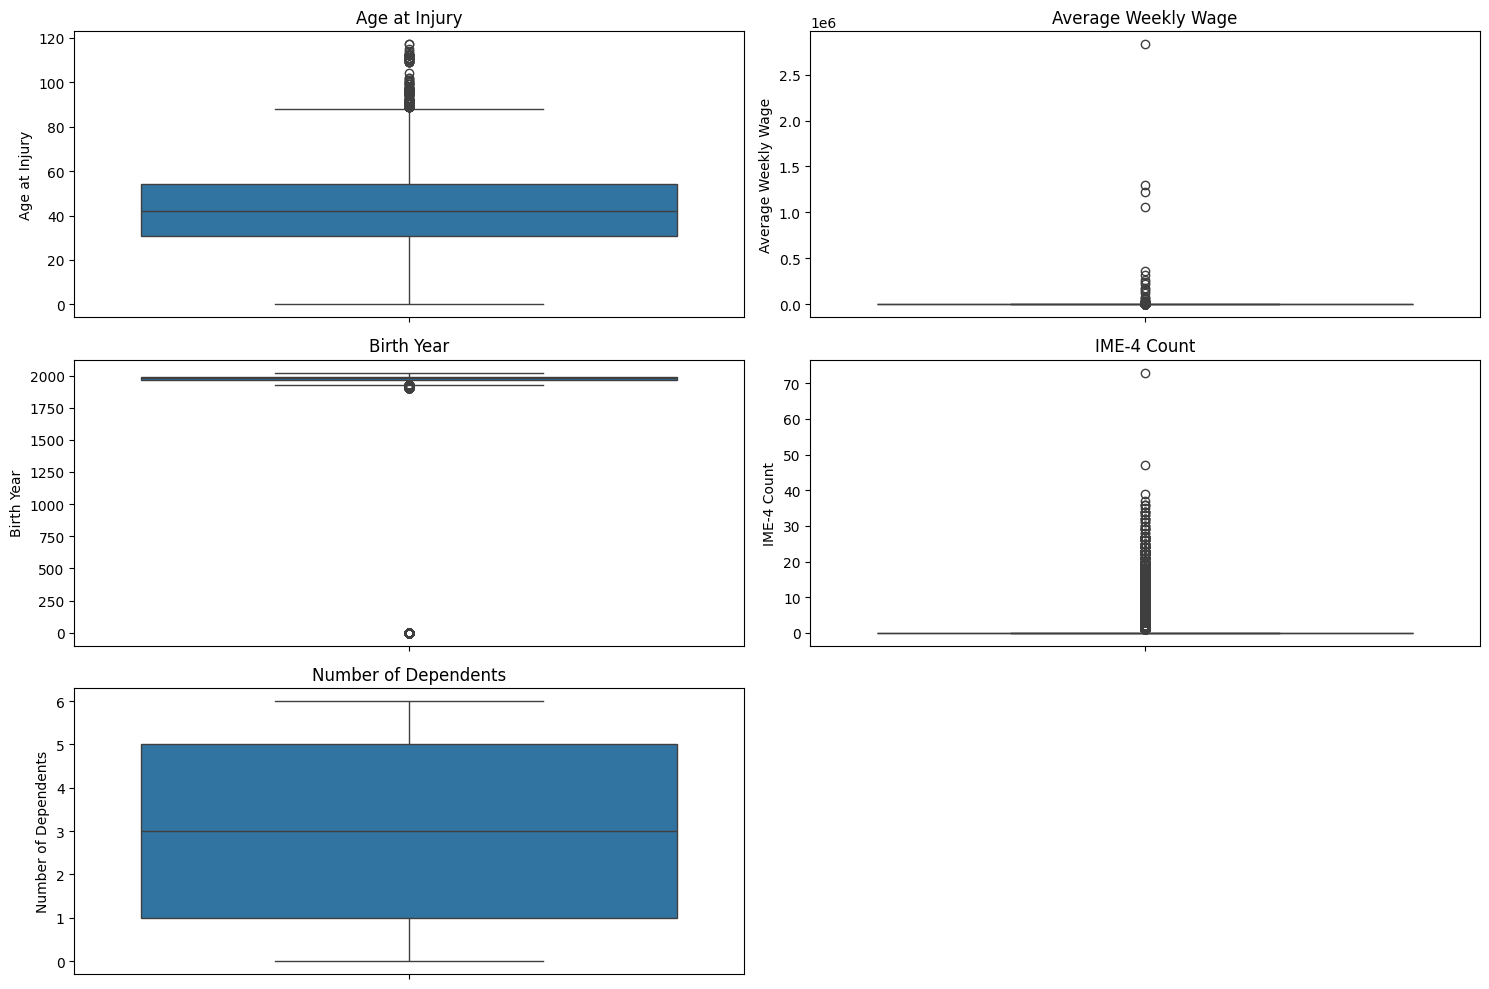

In [ ]:

numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, len(numerical_cols) // 3 + 1, i + 1) 
    sns.boxplot(y=X_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [84]:
X_train[X_train['Birth Year']==0]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Zip Code,Agreement Reached,Number of Dependents,Cause of Injury Category,Nature of Injury Category,Part of Body Category
Claim Identifier,,,,,,,,,,,,,,,,,,,,,
5591392,2020-09-20,0,False,2020-11-03,False,1378.871543,0.0,NaT,NaT,PFL NI CARRIER UNDETERMINED,...,2,60.0,52.0,42.0,12603,False,4,Strain or Injury By,Specific Injury,Trunk
5426944,2020-02-09,43,False,2020-02-11,False,1674.089813,0.0,2020-02-11,NaT,STATE INSURANCE FUND,...,4,29.0,10.0,33.0,11690,False,3,"Fall, Slip or Trip Injury",Specific Injury,Upper Extremities
5434143,2020-02-09,41,False,2020-02-20,True,1414.380000,0.0,2020-02-20,2020-03-10,STATE INSURANCE FUND,...,UNKNOWN,74.0,49.0,25.0,06702,False,5,Struck or Injured By,Specific Injury,Head and Neck
5560595,2020-09-16,34,False,2020-09-17,False,685.340000,0.0,2020-09-17,NaT,OLD REPUBLIC INSURANCE CO.,...,1,25.0,52.0,55.0,14788,False,2,"Fall, Slip or Trip Injury",Specific Injury,Lower Extremities
5662447,2021-02-18,56,False,2021-02-19,False,1214.133583,0.0,2021-02-19,NaT,STATE INSURANCE FUND,...,UNKNOWN,31.0,10.0,30.0,07011,False,2,"Fall, Slip or Trip Injury",Specific Injury,Upper Extremities
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155818,2022-11-29,44,False,2022-12-15,False,1674.089813,0.0,2022-12-15,NaT,"POLICE, FIRE, SANITATION",...,UNKNOWN,81.0,49.0,34.0,06513,False,2,Struck or Injured By,Specific Injury,Upper Extremities
5434102,2020-02-06,34,False,2020-02-20,True,808.007579,0.0,2020-02-20,NaT,DOLGEN OF NEW YORK LLC,...,1,31.0,10.0,42.0,12175,False,4,"Fall, Slip or Trip Injury",Specific Injury,Trunk
5647203,2021-01-09,22,False,2021-01-29,False,1214.133583,0.0,2021-01-29,NaT,MEMIC CASUALTY COMPANY,...,UNKNOWN,29.0,71.0,65.0,16923,False,6,"Fall, Slip or Trip Injury",Occupational Disease or Cumulative Injury,Multiple Body Parts


In [85]:
#Birht year zeros
X_train['Birth Year'] = X_train['Accident Date'].dt.year - X_train['Age at Injury']


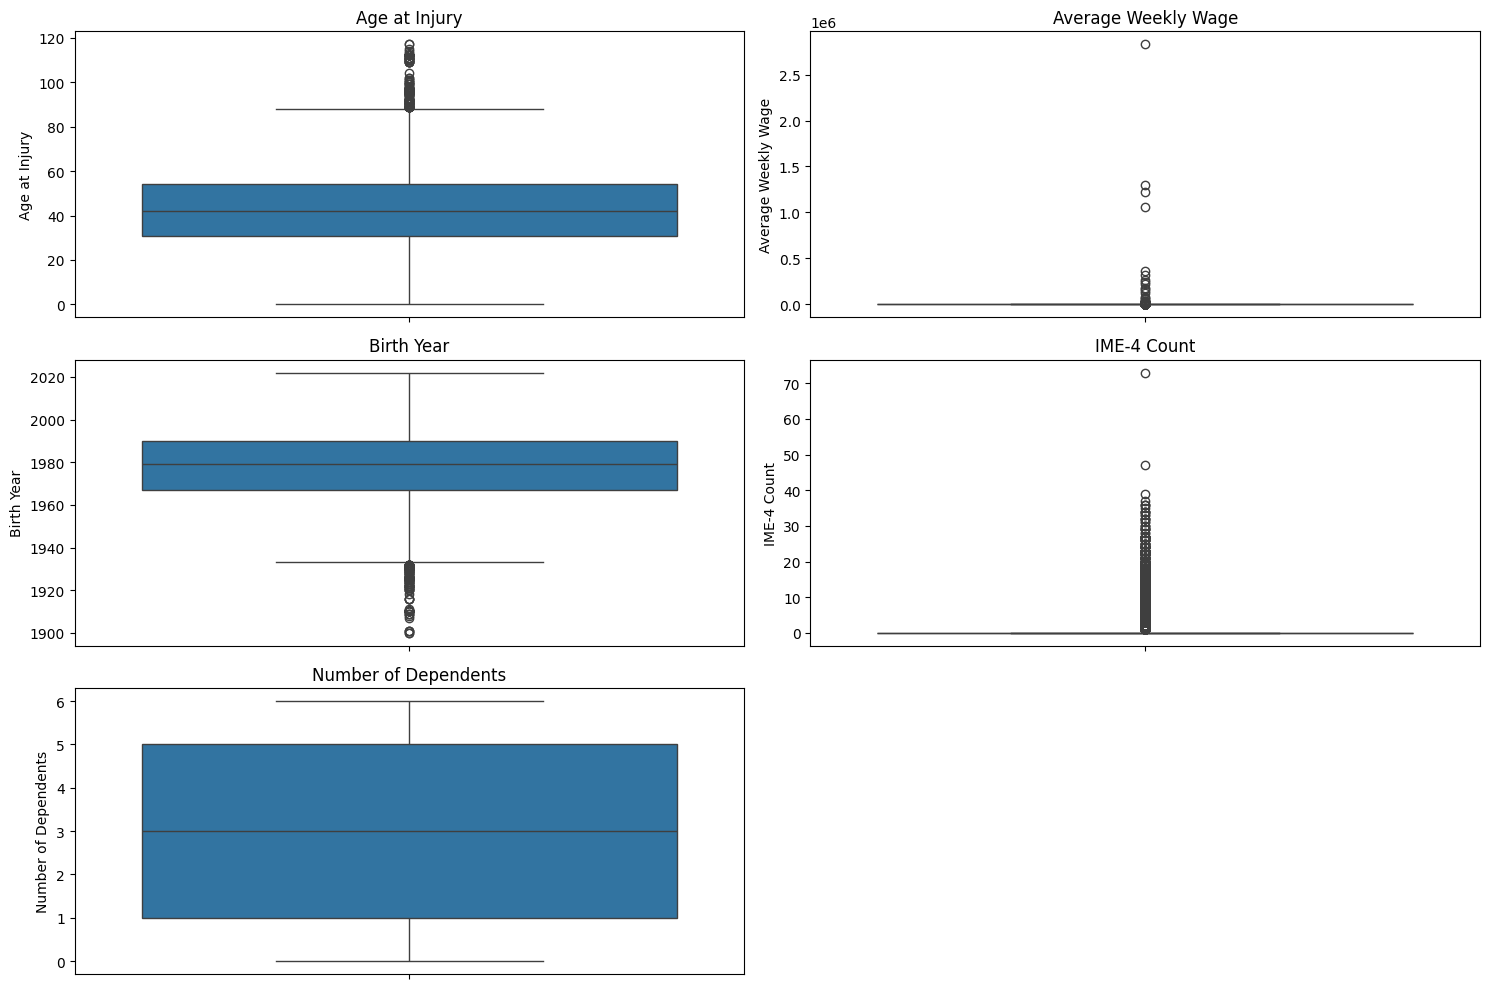

In [87]:

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, len(numerical_cols) // 3 + 1, i + 1) 
    sns.boxplot(y=X_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()